#**2D Linear Gradient**
##Standard Settings
**Particle = $^{199}Hg$**

**Gyromagnetic ratio = $-4.84578839927 \times 10^7\,\frac{1}{T s}$**

**Magnetic field ($B_0$) = $1\,\mu T$**

**Electric field ($E_0$) = $10\,\frac{MV}{m}$**

**Precession time = $1\,s$**

**Chamber height = $12\,cm$**

**Chamber radius = $23.5\,cm$**

**2D simulations**

**Each point represents the results of 10000 particles ran for both parallel and anti-parallel configurations**

In [2]:
%matplotlib inline
import srkdata
import srkmisc
import matplotlib.pyplot as plt
import numpy as np
import math
import srkgraphics
import srkanalysis
from scipy.optimize import curve_fit
from matplotlib.legend_handler import HandlerLine2D
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8
rcParams['xtick.labelsize'] = 20
graphs_dir='/home/mjbales/work/nedm/graphs/'

b_gradient_str = [1.e-10, 1.e-9, 1.e-8]
Omega_range=srkmisc.even_sample_over_log(.1, 10, 100)
legend_titles_b_gradients=[str(x)+' T/m B Gradient' for x in b_gradient_str]
omega_0=(4.84578839927e7*1e-6)
Omega_scale_factor= 0.235*(4.84578839927e7*1e-6)
eta=0.235*omega_0*10e6/(1e-6*299792458*299792458)

import ROOT
from ROOT import TF1,gPad,gStyle,TCanvas,TH1D,gROOT
import rootnotes
import rootprint
gStyle.SetOptFit()
gStyle.SetOptStat(0)
gROOT.ForceStyle();
c1=rootnotes.canvas("Canvas", (1200, 800))
c1.SetRightMargin(0.3)
histogram = TH1D("phi_hist","phi_hist",100,-5,5)
histogram2 = TH1D("phi_hist2","phi_hist2",100,-5,5)
histogram3 = TH1D("phi_hist3","phi_hist3",100,-5,5)

In [3]:
lines = [range(917, 1017),range(1217, 1317)]
legend_tiles = ["Diffuse","Specular"]
color=['blue','red']
linestyles=['-','--']

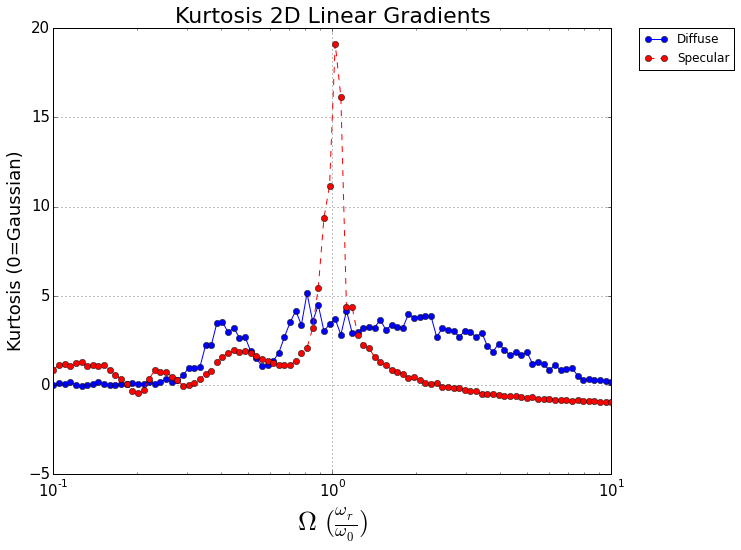

In [9]:
x,y=srkdata.get_plot_data_from_database(lines, "MeanVel", "Par_PhiKurtosis")
for i in range(len(lines)):
    Omega=[j/Omega_scale_factor for j in x[i]]
    plt.semilogx(Omega,y[i],marker='o',label = legend_tiles[i],c=color[i],linestyle=linestyles[i])

plt.tick_params(labelsize=15)
plt.xlabel(r'$\Omega\,(\frac{\omega_r}{\omega_0})$', fontsize=26)
plt.ylabel('Kurtosis (0=Gaussian)', fontsize=18)
plt.title('Kurtosis 2D Linear Gradients', fontsize=22)
plt.grid(True)
#plt.axis([ 8e-19, 2e-13,1e-3, 2e2])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(graphs_dir+'GM151129_LinearGradientKurtosis.svg',bbox_inches='tight')
plt.show()

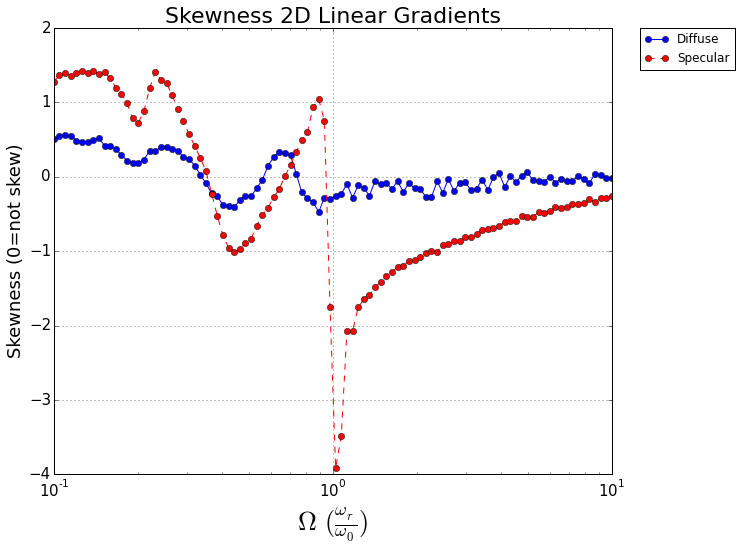

In [3]:
x,y=srkdata.get_plot_data_from_database(lines, "MeanVel", "Par_PhiSkewness")
for i in range(len(lines)):
    Omega=[j/Omega_scale_factor for j in x[i]]
    plt.semilogx(Omega,y[i],marker='o',label = legend_tiles[i],c=color[i],linestyle=linestyles[i])

plt.tick_params(labelsize=15)
plt.xlabel(r'$\Omega\,(\frac{\omega_r}{\omega_0})$', fontsize=26)
plt.ylabel('Skewness (0=not skew)', fontsize=18)
plt.title('Skewness 2D Linear Gradients', fontsize=22)
plt.grid(True)
#plt.axis([ 8e-19, 2e-13,1e-3, 2e2])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(graphs_dir+'GM151129_LinearGradientSkewness.svg',bbox_inches='tight')
plt.show()

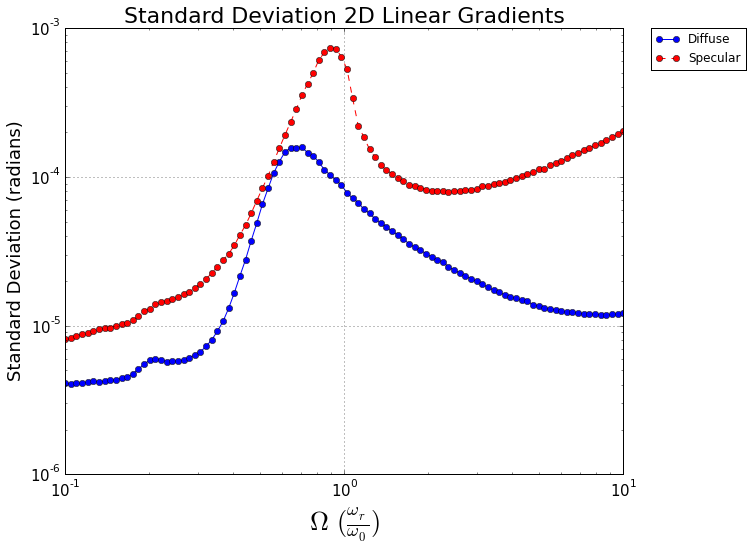

In [4]:
x,y=srkdata.get_plot_data_from_database(lines, "MeanVel", "Par_PhiStDev")
for i in range(len(lines)):
    Omega=[j/Omega_scale_factor for j in x[i]]
    plt.semilogx(Omega,y[i],marker='o',label = legend_tiles[i],c=color[i],linestyle=linestyles[i])

plt.tick_params(labelsize=15)
plt.xlabel(r'$\Omega\,(\frac{\omega_r}{\omega_0})$', fontsize=26)
plt.ylabel('Standard Deviation (radians)', fontsize=18)
plt.title('Standard Deviation 2D Linear Gradients', fontsize=22)
plt.grid(True)
#plt.axis([ 8e-19, 2e-13,1e-3, 2e2])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.yscale('log', noncvposy='clip')
plt.savefig(graphs_dir+'GM151129_LinearGradientStDeV.svg',bbox_inches='tight')
plt.show()

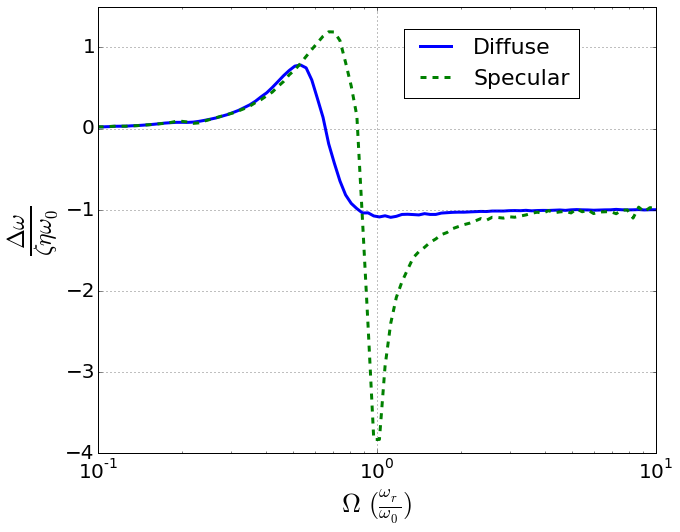

In [4]:
x,y=srkdata.get_plot_data_from_database(lines, "MeanVel", "DeltaOmega")
for i in range(len(lines)):
    zeta=1e-8*0.235/(2.*1e-6)
    Omega=[j/Omega_scale_factor for j in x[i]]
    scaled_edm=[j/(zeta*eta*omega_0) for j in y[i]]
    plt.semilogx(Omega,scaled_edm,marker='',label = legend_tiles[i],c=color[i],linestyle=linestyles[i],linewidth=3)

plt.tick_params(labelsize=20)
plt.xlabel(r'$\Omega\,(\frac{\omega_r}{\omega_0})$', fontsize=26)
plt.ylabel(r'$\frac{\Delta\omega}{\zeta\eta\omega_0}$', fontsize=34)
# plt.title('2D Simulation, Linear Magnetic Gradient', fontsize=22)
plt.grid(True)
plt.axis([ 0.1, 10,-4, 1.5])
plt.legend(bbox_to_anchor=(0.55, .95), loc=2, borderaxespad=0., fontsize=22)
plt.savefig(graphs_dir+'GM151129_LinearGradientFalseEDM.svg',bbox_inches='tight')
plt.show()

In [6]:
lines = [range(4822,4828)+range(5460,5464),range(4833,4839)+range(5464,5468),range(4844,4850)+range(5468,5472),range(4855,4861)+range(5472,5476),range(4866,4872)+range(5476,5480)]
# lines = [range(4822,4833),range(4833,4839),range(4844,4850),range(4855,4861),range(4866,4872)]

legend_titles = ["{:.1e}".format(srkdata.get_data_for_rids_from_database([x[0]],"DipoleFieldStrength")[0][0]
)+ ' $T m^{3}$' for x in lines]

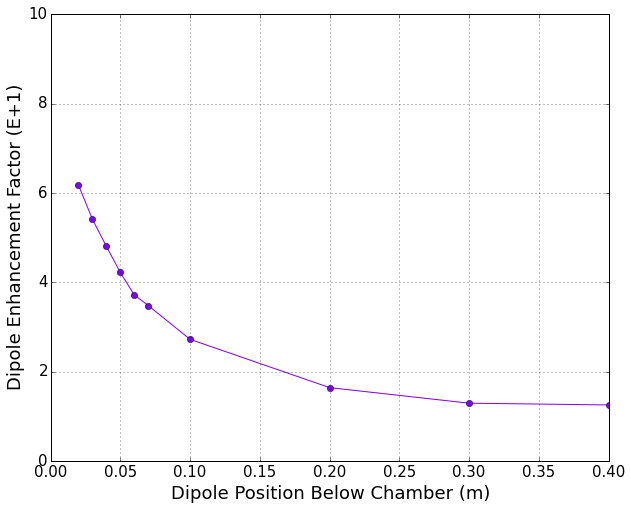

In [10]:
data = srkdata.get_plot_data_from_database_mult(lines, ["DipolePositionBelowChamber","FalseEDM","FalseEDMError","PRPrediction","PREPlusOne"])
fixed_data=[]
for line in [data[0]]:
    fixed_line=[]
    for point in zip(*line):
        fixed_line.append([-point[0],-point[4]*point[1]/point[3],point[4]*point[2]/point[3]])
    fixed_line=zip(*fixed_line)
    fixed_data.append(fixed_line)
titles=["","Dipole Position Below Chamber (m)","Dipole Enhancement Factor (E+1)"]
srkgraphics.make_plot_from_data(fixed_data, titles)
# plt.xscale('log', noncvposy='clip')
plt.axis([ 0.0, 0.40,0, 10])
plt.savefig("/home/mjbales/work/nedm/graphs/GM151129_DipoleEPlusOne.svg", bbox_inches='tight')
plt.show()

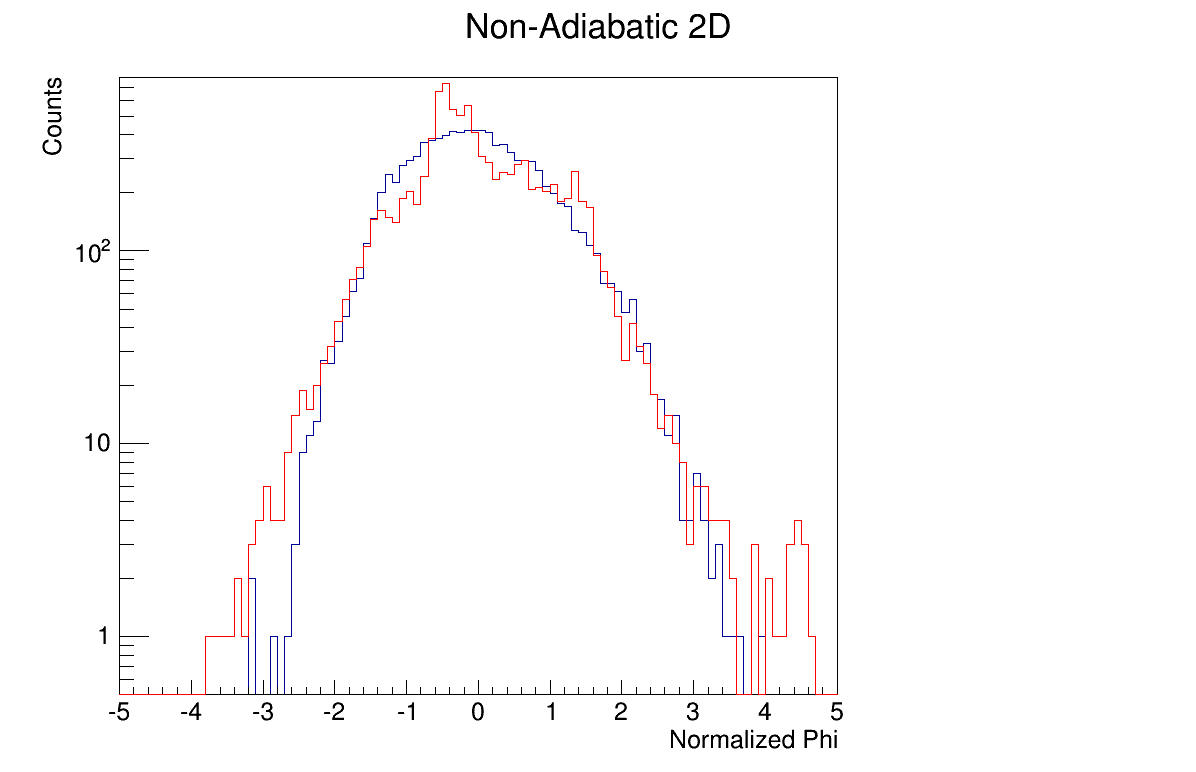

In [2]:
c1.Clear()
rid=1317
rid2=1017
par=True
par_str='Par_' if par else 'Anti_'
mean,stdev,dip_pos,dip_str = srkdata.get_data_for_rids_from_database([rid],par_str+"PhiMean,"+par_str+"PhiStDev,DipolePositionBelowChamber,DipoleFieldStrength")[0]

histogram.IsA().Destructor( histogram )
histogram = TH1D("phi_hist","phi_hist",100,-5,5)
drawString="(phi-"+str(mean)+")/"+str(stdev)+" >> phi_hist"
c1=srkgraphics.make_root_plot_from_results_file(rid,par,drawString)
histogram.SetTitle("Non-Adiabatic 2D;Normalized Phi;Counts")

mean,stdev,dip_pos,dip_str = srkdata.get_data_for_rids_from_database([rid2],par_str+"PhiMean,"+par_str+"PhiStDev,DipolePositionBelowChamber,DipoleFieldStrength")[0]

histogram2.IsA().Destructor( histogram2 )
histogram2 = TH1D("phi_hist2","phi_hist2",100,-5,5)
drawString="(phi-"+str(mean)+")/"+str(stdev)+" >> phi_hist2"
c1=srkgraphics.make_root_plot_from_results_file(rid2,par,drawString)
histogram2.SetTitle("Non-Adiabatic 2D;Normalized Phi;Counts")
histogram2.SetLineColor(ROOT.kRed)

histogram.SetStats(False)
histogram2.SetStats(False)
histogram.Draw()
histogram2.Draw("same")

# c1=srkgraphics.make_root_plot_from_results_file(rid,par,drawString)

# phiTsallisFunc = TF1("phiTsallisFunc", "[0]/pow(1+((x)/[1])*((x)/[1]),[2])", -5)
# max_bin=histogram.GetBinContent(histogram.GetMaximumBin())
# phiTsallisFunc.SetParNames("Amplitude", "Sigma", "Power");
# phiTsallisFunc.SetParLimits(1,0.5,8)
# phiTsallisFunc.SetParLimits(0,0.5*max_bin,1.5*max_bin)
# phiTsallisFunc.SetParLimits(2,0,100)
# phiTsallisFunc.SetParameters(max_bin*.5, stdev,2)
# # histogram.Fit("phiTsallisFunc","M")
# if ROOT.gMinuit.fCstatu == "CONVERGED ":
#     print "YAY!!!"
# print ROOT.gMinuit.fCstatu
# # phiTsallisFunc.Draw("same")
# gaus = TF1("gaus","369*TMath::Gaus(x,0,1)",-5,5)
# gaus.SetLineColor(ROOT.kGreen)
# gaus.Draw("same")
c1.Print(graphs_dir+'GM151129_LinearGradientExamples_NonAdiabatic.svg')
c1.SetLogy()
c1




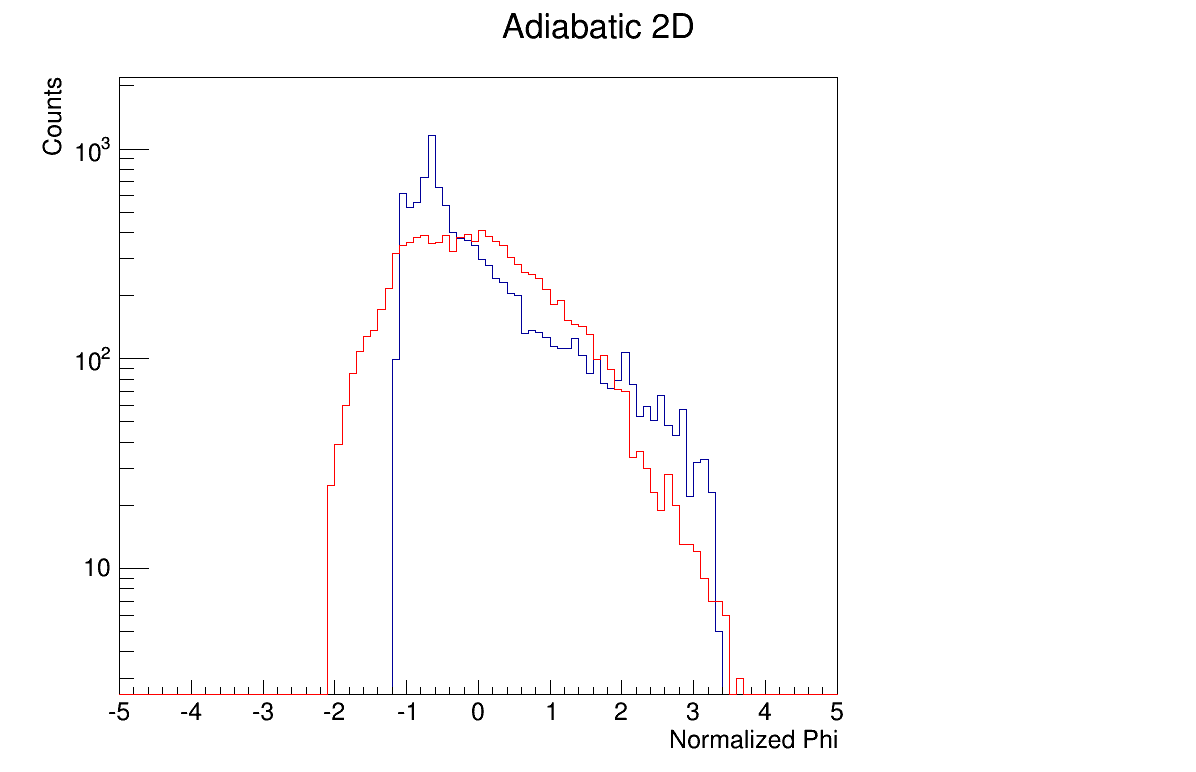

In [3]:
c1.Clear()
rid=1217
rid2=917
par=True
par_str='Par_' if par else 'Anti_'
mean,stdev,dip_pos,dip_str = srkdata.get_data_for_rids_from_database([rid],par_str+"PhiMean,"+par_str+"PhiStDev,DipolePositionBelowChamber,DipoleFieldStrength")[0]

histogram.IsA().Destructor( histogram )
histogram = TH1D("phi_hist","phi_hist",100,-5,5)
drawString="(phi-"+str(mean)+")/"+str(stdev)+" >> phi_hist"
c1=srkgraphics.make_root_plot_from_results_file(rid,par,drawString)
histogram.SetTitle("Adiabatic 2D;Normalized Phi;Counts")

mean,stdev,dip_pos,dip_str = srkdata.get_data_for_rids_from_database([rid2],par_str+"PhiMean,"+par_str+"PhiStDev,DipolePositionBelowChamber,DipoleFieldStrength")[0]

histogram2.IsA().Destructor( histogram2 )
histogram2 = TH1D("phi_hist2","phi_hist2",100,-5,5)
drawString="(phi-"+str(mean)+")/"+str(stdev)+" >> phi_hist2"
c1=srkgraphics.make_root_plot_from_results_file(rid2,par,drawString)
histogram2.SetTitle("Adiabatic 2D;Normalized Phi;Counts")
histogram2.SetLineColor(ROOT.kRed)
histogram.SetStats(False)
histogram2.SetStats(False)
histogram.Draw()
histogram2.Draw("same")

# c1=srkgraphics.make_root_plot_from_results_file(rid,par,drawString)

# phiTsallisFunc = TF1("phiTsallisFunc", "[0]/pow(1+((x)/[1])*((x)/[1]),[2])", -5)
# max_bin=histogram.GetBinContent(histogram.GetMaximumBin())
# phiTsallisFunc.SetParNames("Amplitude", "Sigma", "Power");
# phiTsallisFunc.SetParLimits(1,0.5,8)
# phiTsallisFunc.SetParLimits(0,0.5*max_bin,1.5*max_bin)
# phiTsallisFunc.SetParLimits(2,0,100)
# phiTsallisFunc.SetParameters(max_bin*.5, stdev,2)
# # histogram.Fit("phiTsallisFunc","M")
# if ROOT.gMinuit.fCstatu == "CONVERGED ":
#     print "YAY!!!"
# print ROOT.gMinuit.fCstatu
# # phiTsallisFunc.Draw("same")
# gaus = TF1("gaus","369*TMath::Gaus(x,0,1)",-5,5)
# gaus.SetLineColor(ROOT.kGreen)
# gaus.Draw("same")
c1.Print(graphs_dir+'GM151129_LinearGradientExamples_Adiabatic.svg')
c1.SetLogy()
c1




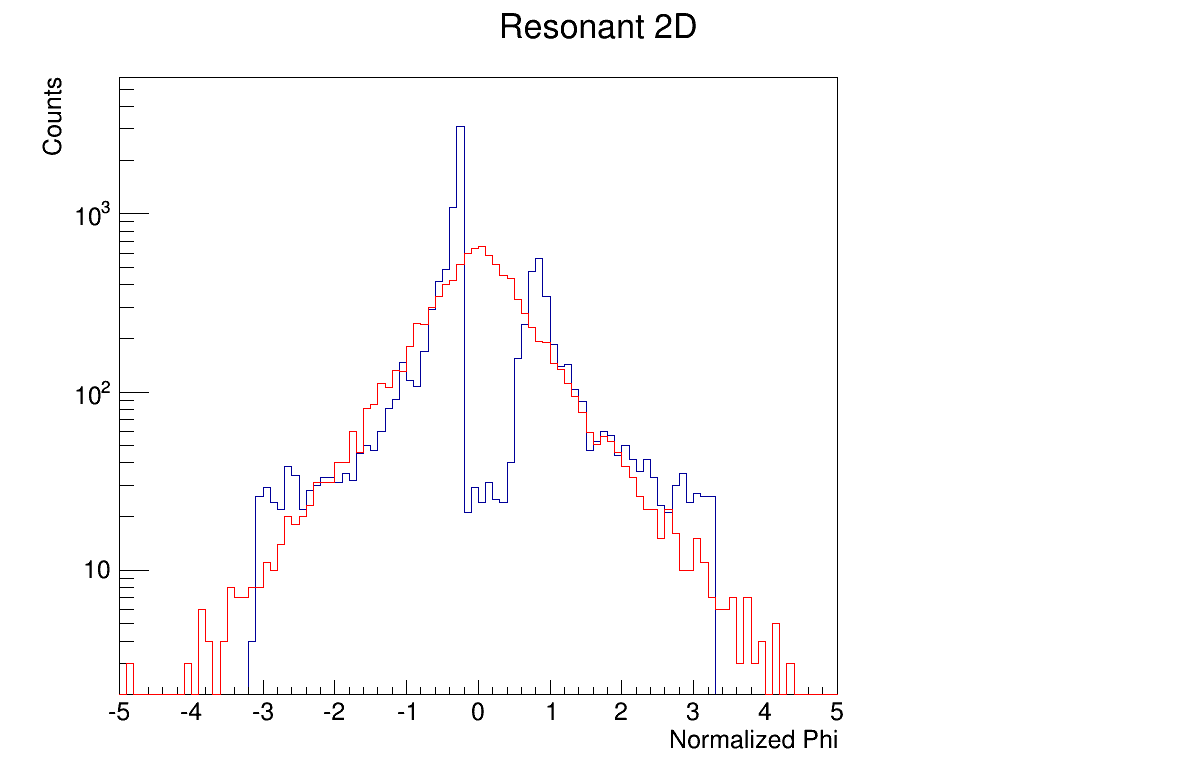

In [2]:
c1.Clear()
rid=1260
rid2=960
par=True
par_str='Par_' if par else 'Anti_'
mean,stdev,dip_pos,dip_str = srkdata.get_data_for_rids_from_database([rid],par_str+"PhiMean,"+par_str+"PhiStDev,DipolePositionBelowChamber,DipoleFieldStrength")[0]

histogram.IsA().Destructor( histogram )
histogram = TH1D("phi_hist","phi_hist",100,-5,5)
drawString="(phi-"+str(mean)+")/"+str(stdev)+" >> phi_hist"
c1=srkgraphics.make_root_plot_from_results_file(rid,par,drawString)
histogram.SetTitle("Resonant 2D;Normalized Phi;Counts")

mean,stdev,dip_pos,dip_str = srkdata.get_data_for_rids_from_database([rid2],par_str+"PhiMean,"+par_str+"PhiStDev,DipolePositionBelowChamber,DipoleFieldStrength")[0]

histogram2.IsA().Destructor( histogram2 )
histogram2 = TH1D("phi_hist2","phi_hist2",100,-5,5)
drawString="(phi-"+str(mean)+")/"+str(stdev)+" >> phi_hist2"
c1=srkgraphics.make_root_plot_from_results_file(rid2,par,drawString)
histogram2.SetTitle("Resonant 2D;Normalized Phi;Counts")
histogram2.SetLineColor(ROOT.kRed)
histogram.SetStats(False)
histogram2.SetStats(False)
histogram.Draw()
histogram2.Draw("same")

# c1=srkgraphics.make_root_plot_from_results_file(rid,par,drawString)

# phiTsallisFunc = TF1("phiTsallisFunc", "[0]/pow(1+((x)/[1])*((x)/[1]),[2])", -5)
# max_bin=histogram.GetBinContent(histogram.GetMaximumBin())
# phiTsallisFunc.SetParNames("Amplitude", "Sigma", "Power");
# phiTsallisFunc.SetParLimits(1,0.5,8)
# phiTsallisFunc.SetParLimits(0,0.5*max_bin,1.5*max_bin)
# phiTsallisFunc.SetParLimits(2,0,100)
# phiTsallisFunc.SetParameters(max_bin*.5, stdev,2)
# # histogram.Fit("phiTsallisFunc","M")
# if ROOT.gMinuit.fCstatu == "CONVERGED ":
#     print "YAY!!!"
# print ROOT.gMinuit.fCstatu
# # phiTsallisFunc.Draw("same")
# gaus = TF1("gaus","369*TMath::Gaus(x,0,1)",-5,5)
# gaus.SetLineColor(ROOT.kGreen)
# gaus.Draw("same")
c1.SetLogy()
c1.Print(graphs_dir+'GM151129_LinearGradientExamples_Resonant.svg')
c1




In [3]:
lines = srkmisc.chunk_list(range(1986,2285),100)+[range(2286, 2386),range(2386, 2486),range(2486, 2586)]
legend_titles_dipole = ["{:.2e}".format(srkdata.get_data_for_rids_from_database([x[0]],"DipoleFieldStrength")[0][0]
)+ ' T M^3 Dipole Strength' for x in lines[:3]]+[str(x)+' T/m Linear Gradient' for x in b_gradient_str]
print legend_titles_dipole

['1.00e-18 T M^3 Dipole Strength', '1.00e-16 T M^3 Dipole Strength', '1.00e-14 T M^3 Dipole Strength', '1e-10 T/m Linear Gradient', '1e-09 T/m Linear Gradient', '1e-08 T/m Linear Gradient']


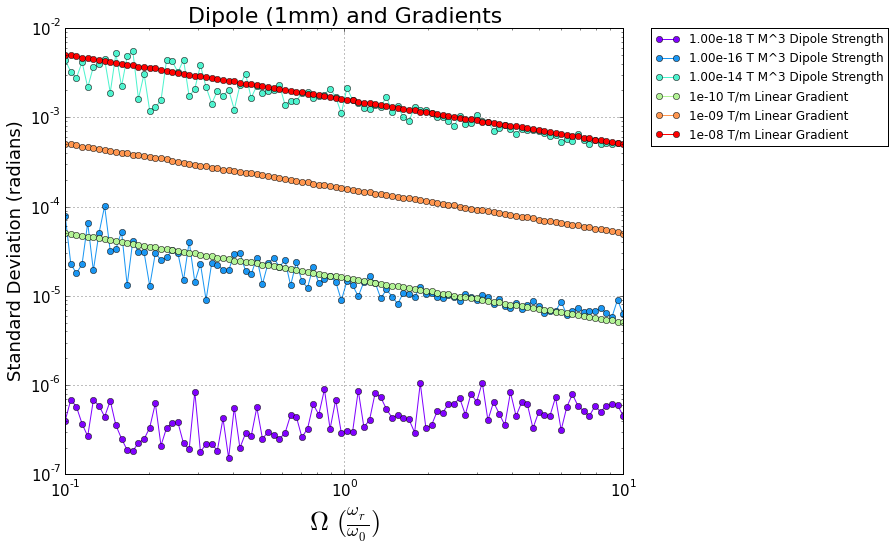

In [35]:
x,y=srkdata.get_plot_data_from_database(lines, "MeanVel", "Par_PhiStDev")
color=iter(plt.cm.rainbow(np.linspace(0,1,len(lines))))
for i in range(len(lines)):
    Omega=[j/Omega_scale_factor for j in x[i]]
    plt.loglog(Omega,y[i],marker='o',label = legend_titles_dipole[i],c=next(color))

plt.tick_params(labelsize=15)
plt.xlabel(r'$\Omega\,(\frac{\omega_r}{\omega_0})$', fontsize=26)
plt.ylabel('Standard Deviation (radians)', fontsize=18)
plt.title('Dipole (1mm) and Gradients', fontsize=22)
plt.grid(True)
#plt.axis([ 8e-19, 2e-13,1e-3, 2e2])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("/home/mjbales/work/nedm/graphs/GM151129_3DMagGradientsStDev.svg", bbox_inches='tight')
plt.show()

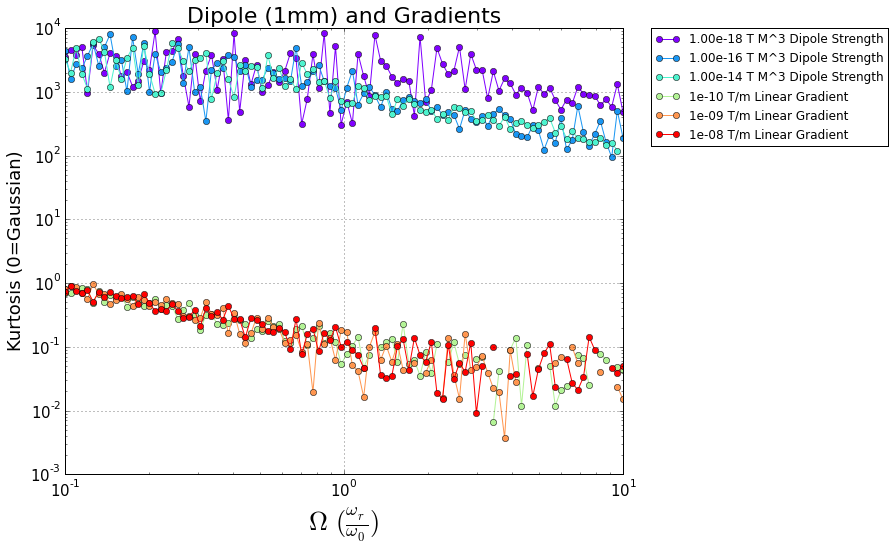

In [4]:
x,y=srkdata.get_plot_data_from_database(lines, "MeanVel", "Par_PhiKurtosis")
color=iter(plt.cm.rainbow(np.linspace(0,1,len(lines))))
for i in range(len(lines)):
    Omega=[j/Omega_scale_factor for j in x[i]]
    plt.loglog(Omega,y[i],marker='o',label = legend_titles_dipole[i],c=next(color))

plt.tick_params(labelsize=15)
plt.xlabel(r'$\Omega\,(\frac{\omega_r}{\omega_0})$', fontsize=26)
plt.ylabel('Kurtosis (0=Gaussian)', fontsize=18)
plt.title('Dipole (1mm) and Gradients', fontsize=22)
plt.grid(True)
#plt.axis([ 8e-19, 2e-13,1e-3, 2e2])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("/home/mjbales/work/nedm/graphs/GM151129_3DMagGradientsKurtosis.svg", bbox_inches='tight')
plt.show()

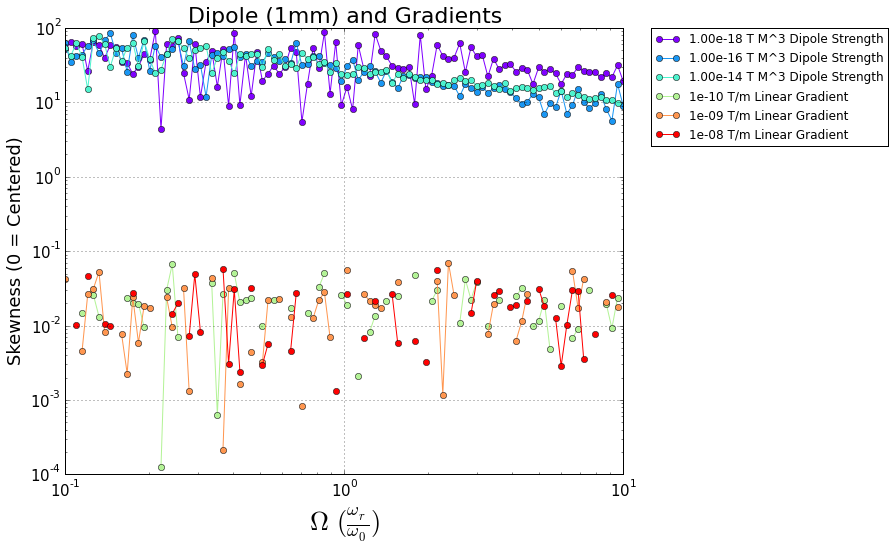

In [37]:
x,y=srkdata.get_plot_data_from_database(lines, "MeanVel", "Par_PhiSkewness")
color=iter(plt.cm.rainbow(np.linspace(0,1,len(lines))))
for i in range(len(lines)):
    Omega=[j/Omega_scale_factor for j in x[i]]
    plt.loglog(Omega,y[i],marker='o',label = legend_titles_dipole[i],c=next(color))

plt.tick_params(labelsize=15)
plt.xlabel(r'$\Omega\,(\frac{\omega_r}{\omega_0})$', fontsize=26)
plt.ylabel('Skewness (0 = Centered)', fontsize=18)
plt.title('Dipole (1mm) and Gradients', fontsize=22)
plt.grid(True)
#plt.axis([ 8e-19, 2e-13,1e-3, 2e2])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("/home/mjbales/work/nedm/graphs/GM151129_3DMagGradientsSkewness.svg", bbox_inches='tight')
plt.show()

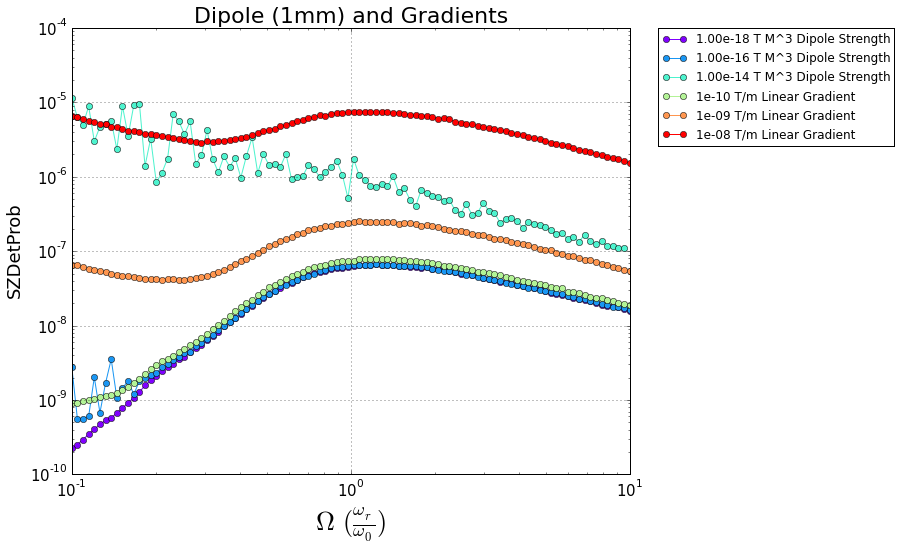

In [29]:
x,y=srkdata.get_plot_data_from_database(lines, "MeanVel", "Par_SZDetProb")
color=iter(plt.cm.rainbow(np.linspace(0,1,len(lines))))
for i in range(len(lines)):
    Omega=[j/Omega_scale_factor for j in x[i]]
    plt.loglog(Omega,y[i],marker='o',label = legend_titles_dipole[i],c=next(color))

plt.tick_params(labelsize=15)
plt.xlabel(r'$\Omega\,(\frac{\omega_r}{\omega_0})$', fontsize=26)
plt.ylabel('SZDetProb', fontsize=18)
plt.title('Dipole (1mm) and Gradients', fontsize=22)
plt.grid(True)
#plt.axis([ 8e-19, 2e-13,1e-3, 2e2])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("/home/mjbales/work/nedm/graphs/GM151129_3DMagGradientsSzDet.svg", bbox_inches='tight')
plt.show()

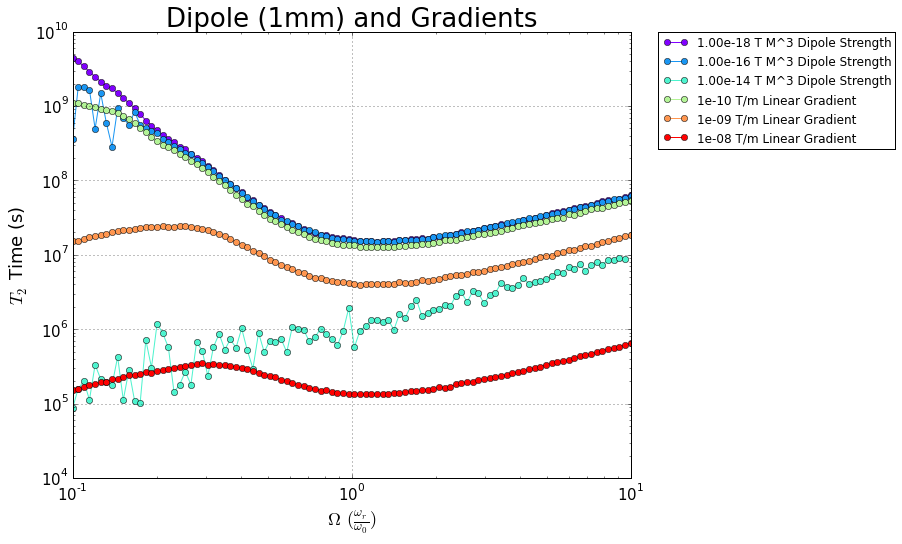

In [30]:
lambda_func=[lambda x: x / Omega_scale_factor,lambda x: -1./math.log(1-x),lambda x: x / Omega_scale_factor,lambda x: -1./math.log(1-x)]
# lambda_func=[lambda x: x / Omega_scale_factor,lambda x: x,lambda x: x / Omega_scale_factor,lambda x: x]
srkgraphics.make_plot_from_database(lines, ["MeanVel", "Par_SZDetProb"], 
                        titles=['Dipole (1mm) and Gradients',r'$\Omega\,(\frac{\omega_r}{\omega_0})$',r'$T_2$ Time (s)',], 
                        legend_titles=legend_titles_dipole,lambda_func=lambda_func)
plt.yscale('log', noncvposy='clip')
plt.xscale('log', noncvposy='clip')
plt.savefig("/home/mjbales/work/nedm/graphs/GM151129_3DMagGradientsT2.svg", bbox_inches='tight')
plt.show()

In [44]:
lines = [range(4822,4828),range(4833,4839),range(4844,4850),range(4855,4861),range(4866,4872),range(4876,4883)]
rid_list2=range(4886,4952)
rid_chunks = [rid_list2[x:x+11] for x in xrange(0, len(rid_list2), 11)]

lines = [rid_chunks[i]+lines[i] for i in range(len(rid_chunks))]
print lines
legend_titles = ["{:.1e}".format(srkdata.get_data_for_rids_from_database([x[0]],"DipoleFieldStrength")[0][0]
)+ ' $T m^{3}$' for x in lines]

[[4886, 4887, 4888, 4889, 4890, 4891, 4892, 4893, 4894, 4895, 4896, 4822, 4823, 4824, 4825, 4826, 4827], [4897, 4898, 4899, 4900, 4901, 4902, 4903, 4904, 4905, 4906, 4907, 4833, 4834, 4835, 4836, 4837, 4838], [4908, 4909, 4910, 4911, 4912, 4913, 4914, 4915, 4916, 4917, 4918, 4844, 4845, 4846, 4847, 4848, 4849], [4919, 4920, 4921, 4922, 4923, 4924, 4925, 4926, 4927, 4928, 4929, 4855, 4856, 4857, 4858, 4859, 4860], [4930, 4931, 4932, 4933, 4934, 4935, 4936, 4937, 4938, 4939, 4940, 4866, 4867, 4868, 4869, 4870, 4871], [4941, 4942, 4943, 4944, 4945, 4946, 4947, 4948, 4949, 4950, 4951, 4876, 4877, 4878, 4879, 4880, 4881, 4882]]


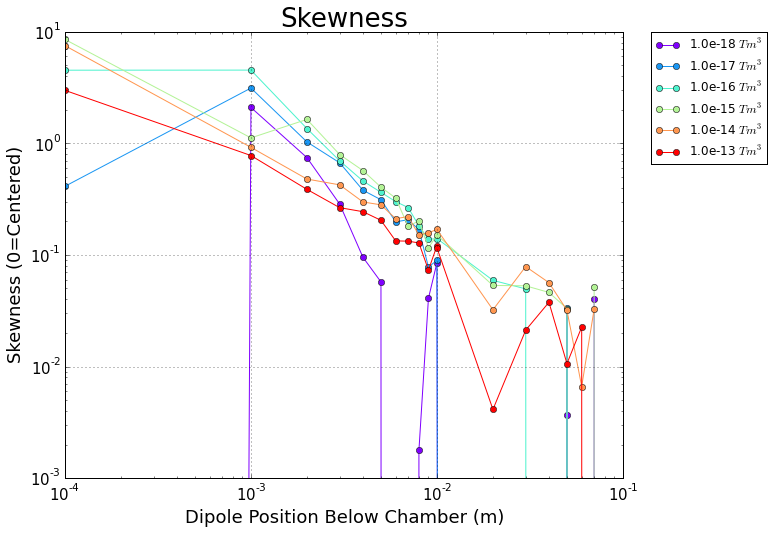

In [39]:
columns=["DipolePositionBelowChamber","Par_PhiSkewness"]
titles=["Skewness","Dipole Position Below Chamber (m)","Skewness (0=Centered)"]
lambdas=[lambda x : -x,lambda x: x]
# print lines[0]
srkgraphics.make_plot_from_database(lines,columns,titles,legend_titles,lambdas)
plt.yscale('log', noncvposy='clip')
plt.xscale('log', noncvposy='clip')
plt.savefig("/home/mjbales/work/nedm/graphs/GM151129_3DDipoleDistancesSkewness.svg", bbox_inches='tight')
plt.show()

-0.001 1e-16
-0.02 1e-16
-0.0001 1e-16


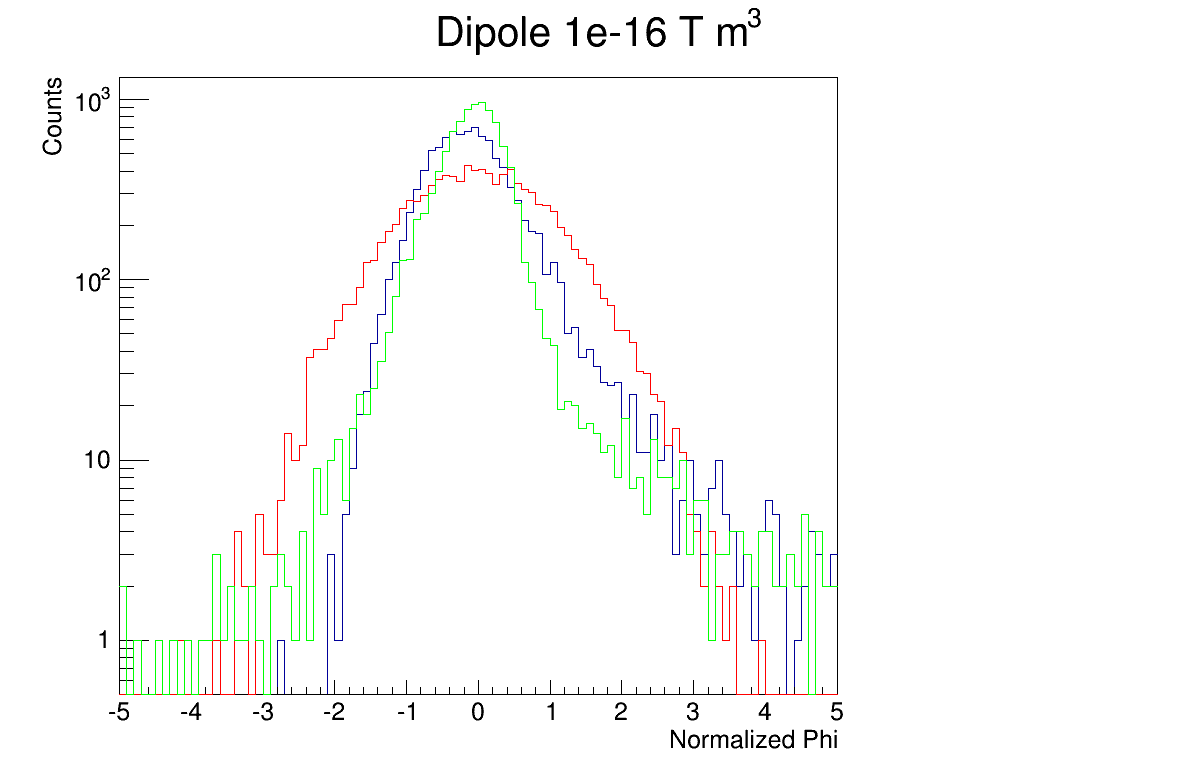

In [8]:
c1.Clear()
rid=4842
rid2=4844
rid3=4908
par=True
par_str='Par_' if par else 'Anti_'
mean,stdev,dip_pos,dip_str = srkdata.get_data_for_rids_from_database([rid],par_str+"PhiMean,"+par_str+"PhiStDev,DipolePositionBelowChamber,DipoleFieldStrength")[0]
print dip_pos, dip_str
histogram.IsA().Destructor( histogram )
histogram = TH1D("phi_hist","phi_hist",100,-5,5)
drawString="(phi-"+str(mean)+")/"+str(stdev)+" >> phi_hist"
c1=srkgraphics.make_root_plot_from_results_file(rid,par,drawString)
histogram.SetTitle("Dipole 1e-16 T m^{3};Normalized Phi;Counts")
histogram.SetStats(False)

mean,stdev,dip_pos,dip_str = srkdata.get_data_for_rids_from_database([rid2],par_str+"PhiMean,"+par_str+"PhiStDev,DipolePositionBelowChamber,DipoleFieldStrength")[0]
print dip_pos, dip_str
histogram2.IsA().Destructor( histogram2 )
histogram2 = TH1D("phi_hist2","phi_hist2",100,-5,5)
drawString="(phi-"+str(mean)+")/"+str(stdev)+" >> phi_hist2"
c1=srkgraphics.make_root_plot_from_results_file(rid2,par,drawString)
histogram2.SetTitle("Dipole;Normalized Phi;Counts")
histogram2.SetLineColor(ROOT.kRed)
histogram2.SetStats(False)

mean,stdev,dip_pos,dip_str = srkdata.get_data_for_rids_from_database([rid3],par_str+"PhiMean,"+par_str+"PhiStDev,DipolePositionBelowChamber,DipoleFieldStrength")[0]
print dip_pos, dip_str
histogram3.IsA().Destructor( histogram3 )
histogram3 = TH1D("phi_hist3","phi_hist3",100,-5,5)
drawString="(phi-"+str(mean)+")/"+str(stdev)+" >> phi_hist3"
c1=srkgraphics.make_root_plot_from_results_file(rid3,par,drawString)
histogram3.SetTitle("Dipole;Normalized Phi;Counts")
histogram3.SetLineColor(ROOT.kGreen)
histogram3.SetStats(False)

histogram.Draw()
histogram2.Draw("same")
histogram3.Draw("same")

# c1=srkgraphics.make_root_plot_from_results_file(rid,par,drawString)

# phiTsallisFunc = TF1("phiTsallisFunc", "[0]/pow(1+((x)/[1])*((x)/[1]),[2])", -5)
# max_bin=histogram.GetBinContent(histogram.GetMaximumBin())
# phiTsallisFunc.SetParNames("Amplitude", "Sigma", "Power");
# phiTsallisFunc.SetParLimits(1,0.5,8)
# phiTsallisFunc.SetParLimits(0,0.5*max_bin,1.5*max_bin)
# phiTsallisFunc.SetParLimits(2,0,100)
# phiTsallisFunc.SetParameters(max_bin*.5, stdev,2)
# # histogram.Fit("phiTsallisFunc","M")
# if ROOT.gMinuit.fCstatu == "CONVERGED ":
#     print "YAY!!!"
# print ROOT.gMinuit.fCstatu
# # phiTsallisFunc.Draw("same")
# gaus = TF1("gaus","369*TMath::Gaus(x,0,1)",-5,5)
# gaus.SetLineColor(ROOT.kGreen)
# gaus.Draw("same")
c1.Print(graphs_dir+'GM151129_DipoleExamples.svg')
c1.SetLogy()
c1




-0.001 1e-16
-0.02 1e-16
-0.0001 1e-16


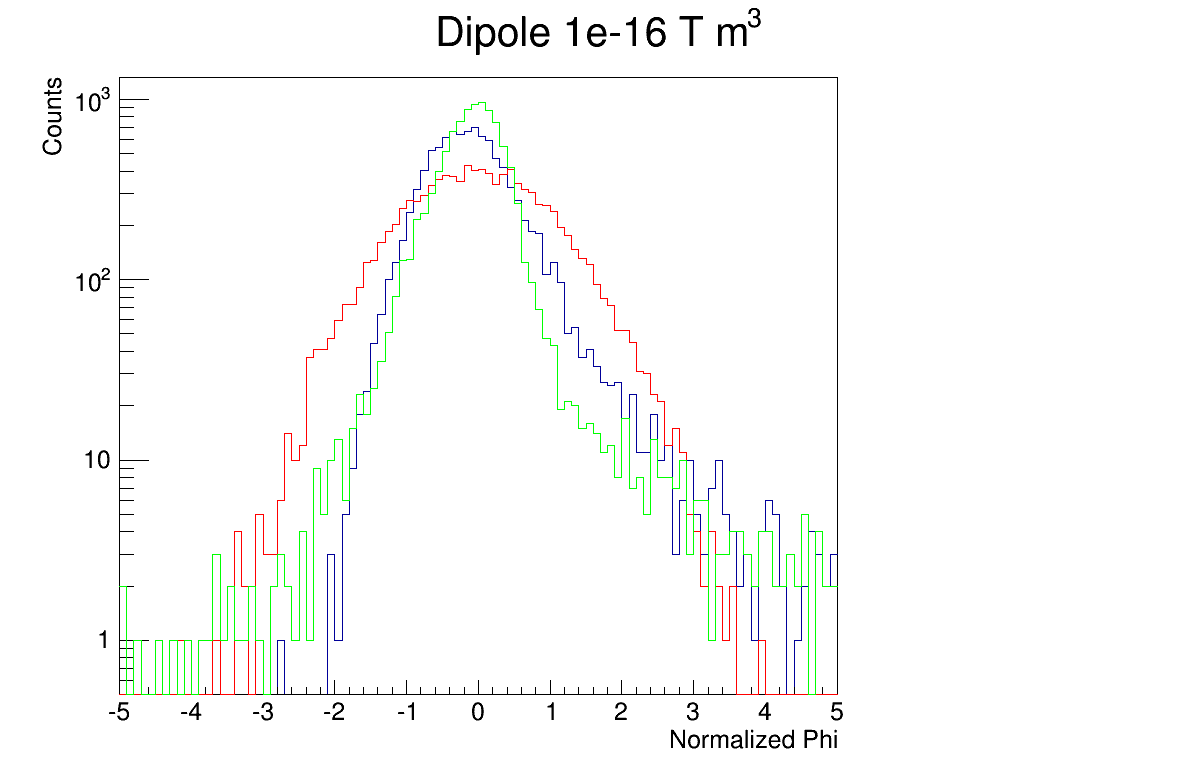

In [16]:
c1.Clear()
rid=4842
rid2=4844
rid3=4908
par=True
par_str='Par_' if par else 'Anti_'
mean,stdev,dip_pos,dip_str = srkdata.get_data_for_rids_from_database([rid],par_str+"PhiMean,"+par_str+"PhiStDev,DipolePositionBelowChamber,DipoleFieldStrength")[0]
print dip_pos, dip_str
histogram.IsA().Destructor( histogram )
histogram = TH1D("phi_hist","phi_hist",100,-5,5)
drawString="(phi-"+str(mean)+")/"+str(stdev)+" >> phi_hist"
c1=srkgraphics.make_root_plot_from_results_file(rid,par,drawString)
histogram.SetTitle("Dipole 1e-16 T m^{3};Normalized Phi;Counts")
histogram.SetStats(False)

mean,stdev,dip_pos,dip_str = srkdata.get_data_for_rids_from_database([rid2],par_str+"PhiMean,"+par_str+"PhiStDev,DipolePositionBelowChamber,DipoleFieldStrength")[0]
print dip_pos, dip_str
histogram2.IsA().Destructor( histogram2 )
histogram2 = TH1D("phi_hist2","phi_hist2",100,-5,5)
drawString="(phi-"+str(mean)+")/"+str(stdev)+" >> phi_hist2"
c1=srkgraphics.make_root_plot_from_results_file(rid2,par,drawString)
histogram2.SetTitle("Dipole;Normalized Phi;Counts")
histogram2.SetLineColor(ROOT.kRed)
histogram2.SetStats(False)

mean,stdev,dip_pos,dip_str = srkdata.get_data_for_rids_from_database([rid3],par_str+"PhiMean,"+par_str+"PhiStDev,DipolePositionBelowChamber,DipoleFieldStrength")[0]
print dip_pos, dip_str
histogram3.IsA().Destructor( histogram3 )
histogram3 = TH1D("phi_hist3","phi_hist3",100,-5,5)
drawString="(phi-"+str(mean)+")/"+str(stdev)+" >> phi_hist3"
c1=srkgraphics.make_root_plot_from_results_file(rid3,par,drawString)
histogram3.SetTitle("Dipole;Normalized Phi;Counts")
histogram3.SetLineColor(ROOT.kGreen)
histogram3.SetStats(False)

histogram.Draw()
histogram2.Draw("same")
histogram3.Draw("same")

# c1=srkgraphics.make_root_plot_from_results_file(rid,par,drawString)

# phiTsallisFunc = TF1("phiTsallisFunc", "[0]/pow(1+((x)/[1])*((x)/[1]),[2])", -5)
# max_bin=histogram.GetBinContent(histogram.GetMaximumBin())
# phiTsallisFunc.SetParNames("Amplitude", "Sigma", "Power");
# phiTsallisFunc.SetParLimits(1,0.5,8)
# phiTsallisFunc.SetParLimits(0,0.5*max_bin,1.5*max_bin)
# phiTsallisFunc.SetParLimits(2,0,100)
# phiTsallisFunc.SetParameters(max_bin*.5, stdev,2)
# # histogram.Fit("phiTsallisFunc","M")
# if ROOT.gMinuit.fCstatu == "CONVERGED ":
#     print "YAY!!!"
# print ROOT.gMinuit.fCstatu
# # phiTsallisFunc.Draw("same")
# gaus = TF1("gaus","369*TMath::Gaus(x,0,1)",-5,5)
# gaus.SetLineColor(ROOT.kGreen)
# gaus.Draw("same")
c1.Print(graphs_dir+'GM151129_DipoleExamples.svg')
c1.SetLogy()
c1




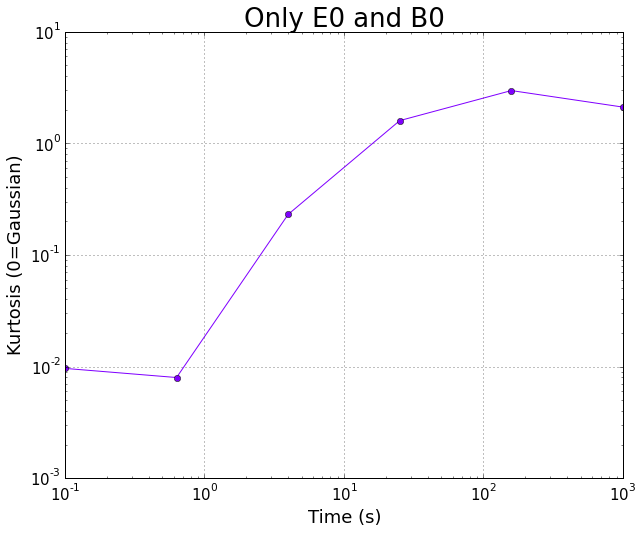

In [11]:
# lambda_func=[lambda x: x / Omega_scale_factor,lambda x: -1./math.log(1-x),lambda x: x / Omega_scale_factor,lambda x: -1./math.log(1-x)]
# lambda_func=[lambda x: x / Omega_scale_factor,lambda x: x,lambda x: x / Omega_scale_factor,lambda x: x]
lines=[range(5392,5398)]
srkgraphics.make_plot_from_database(lines, ["TimeLimit", "Par_PhiKurtosis"], 
                        titles=['Only E0 and B0',r'Time (s)','Kurtosis (0=Gaussian)',])
plt.yscale('log', noncvposy='clip')
plt.xscale('log', noncvposy='clip')
plt.savefig("/home/mjbales/work/nedm/graphs/GM151129_3DEOnlyKurtorsisvsTime.svg", bbox_inches='tight')
plt.show()

3.98107170553
25.1188643151
158.489319246


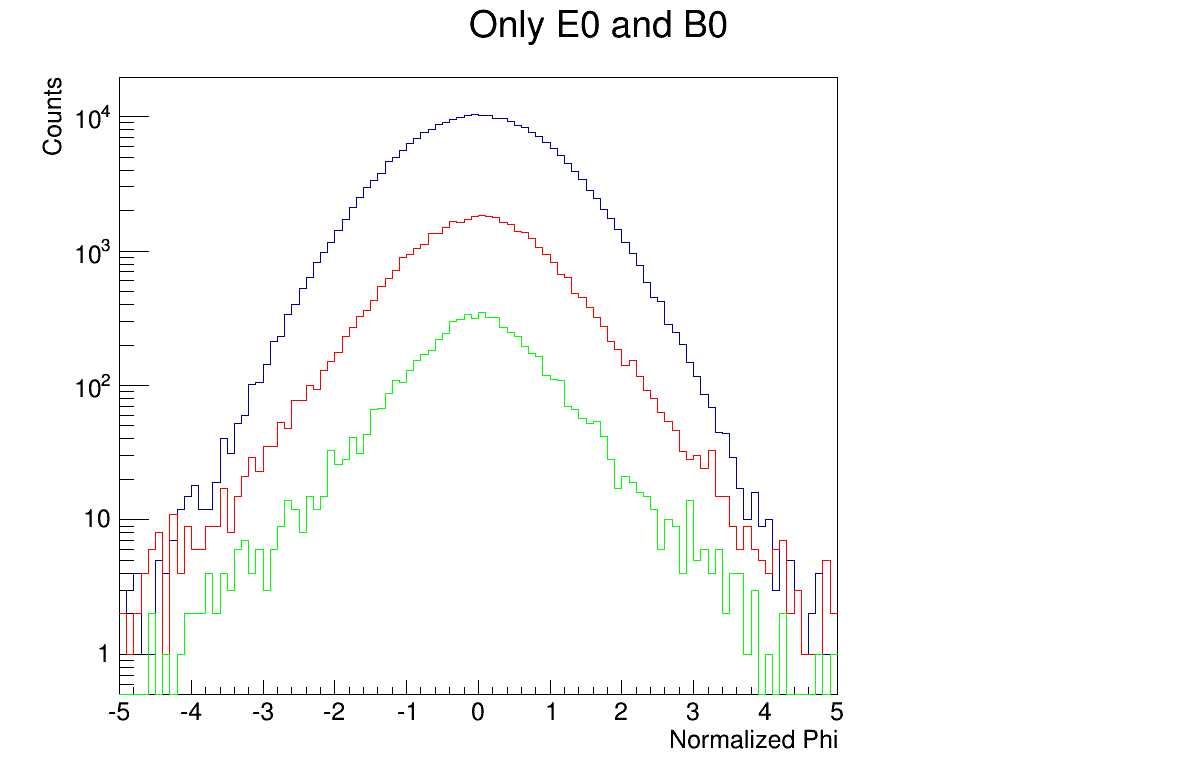

In [17]:
c1.Clear()
rid=5394
rid2=5395
rid3=5396
par=True
par_str='Par_' if par else 'Anti_'
mean,stdev,time = srkdata.get_data_for_rids_from_database([rid],par_str+"PhiMean,"+par_str+"PhiStDev,TimeLimit")[0]
print time
histogram.IsA().Destructor( histogram )
histogram = TH1D("phi_hist","phi_hist",100,-5,5)
drawString="(phi-"+str(mean)+")/"+str(stdev)+" >> phi_hist"
c1=srkgraphics.make_root_plot_from_results_file(rid,par,drawString)
histogram.SetTitle("Only E0 and B0;Normalized Phi;Counts")
histogram.SetStats(False)

mean,stdev,time = srkdata.get_data_for_rids_from_database([rid2],par_str+"PhiMean,"+par_str+"PhiStDev,TimeLimit")[0]
print time
histogram2.IsA().Destructor( histogram2 )
histogram2 = TH1D("phi_hist2","phi_hist2",100,-5,5)
drawString="(phi-"+str(mean)+")/"+str(stdev)+" >> phi_hist2"
c1=srkgraphics.make_root_plot_from_results_file(rid2,par,drawString)
histogram2.SetTitle("Dipole;Normalized Phi;Counts")
histogram2.SetLineColor(ROOT.kRed)
histogram2.SetStats(False)

mean,stdev,time = srkdata.get_data_for_rids_from_database([rid3],par_str+"PhiMean,"+par_str+"PhiStDev,TimeLimit")[0]
print time
histogram3.IsA().Destructor( histogram3 )
histogram3 = TH1D("phi_hist3","phi_hist3",100,-5,5)
drawString="(phi-"+str(mean)+")/"+str(stdev)+" >> phi_hist3"
c1=srkgraphics.make_root_plot_from_results_file(rid3,par,drawString)
histogram3.SetTitle("Dipole;Normalized Phi;Counts")
histogram3.SetLineColor(ROOT.kGreen)
histogram3.SetStats(False)

histogram.Draw()
histogram2.Draw("same")
histogram3.Draw("same")

# c1=srkgraphics.make_root_plot_from_results_file(rid,par,drawString)

# phiTsallisFunc = TF1("phiTsallisFunc", "[0]/pow(1+((x)/[1])*((x)/[1]),[2])", -5)
# max_bin=histogram.GetBinContent(histogram.GetMaximumBin())
# phiTsallisFunc.SetParNames("Amplitude", "Sigma", "Power");
# phiTsallisFunc.SetParLimits(1,0.5,8)
# phiTsallisFunc.SetParLimits(0,0.5*max_bin,1.5*max_bin)
# phiTsallisFunc.SetParLimits(2,0,100)
# phiTsallisFunc.SetParameters(max_bin*.5, stdev,2)
# # histogram.Fit("phiTsallisFunc","M")
# if ROOT.gMinuit.fCstatu == "CONVERGED ":
#     print "YAY!!!"
# print ROOT.gMinuit.fCstatu
# # phiTsallisFunc.Draw("same")
# gaus = TF1("gaus","369*TMath::Gaus(x,0,1)",-5,5)
# gaus.SetLineColor(ROOT.kGreen)
# gaus.Draw("same")
c1.Print(graphs_dir+'GM151129_E0B0OnlyExamples.svg')
c1.SetLogy()
c1




3.98107170553
25.1188643151
158.489319246
19.5129180193
4.21549987236
2.25821994347


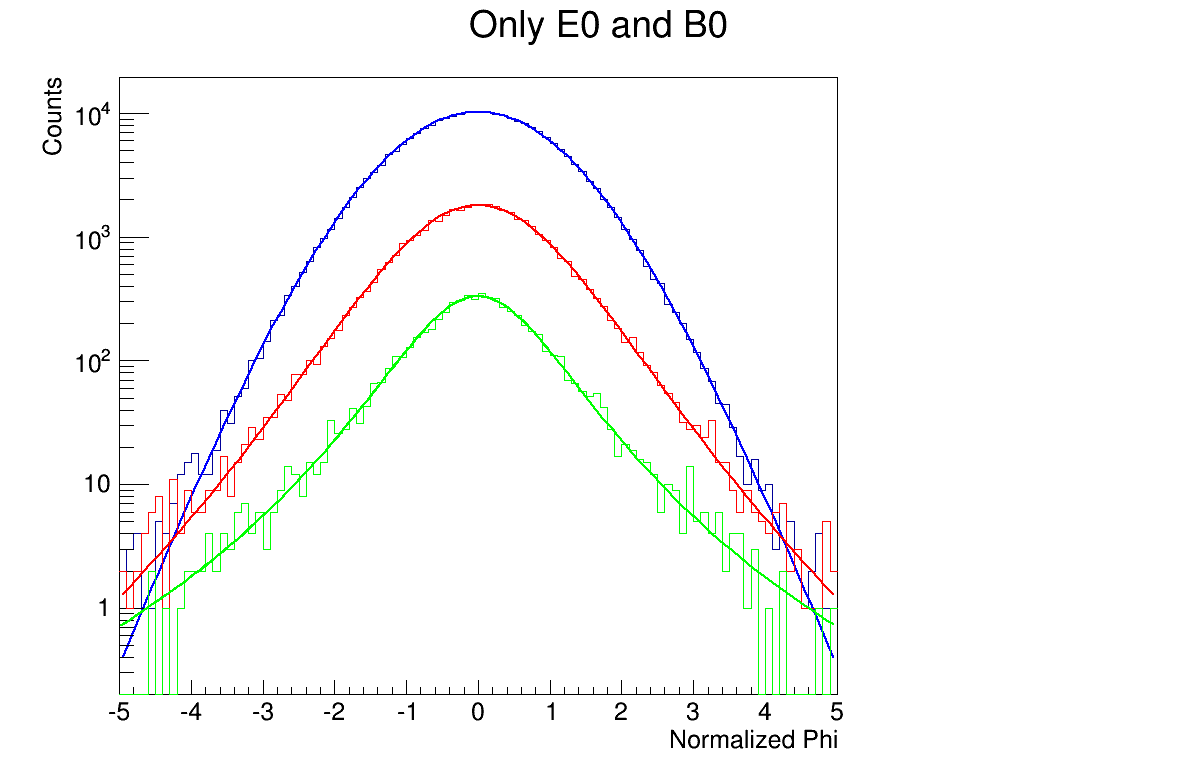

In [2]:
c1.Clear()
rid=5394
rid2=5395
rid3=5396
par=True
par_str='Par_' if par else 'Anti_'
mean,stdev,time = srkdata.get_data_for_rids_from_database([rid],par_str+"PhiMean,"+par_str+"PhiStDev,TimeLimit")[0]
print time
histogram.IsA().Destructor( histogram )
histogram = TH1D("phi_hist","phi_hist",100,-5,5)
drawString="(phi-"+str(mean)+")/"+str(stdev)+" >> phi_hist"
c1=srkgraphics.make_root_plot_from_results_file(rid,par,drawString)
histogram.SetTitle("Only E0 and B0;Normalized Phi;Counts")
histogram.SetStats(False)

mean,stdev,time = srkdata.get_data_for_rids_from_database([rid2],par_str+"PhiMean,"+par_str+"PhiStDev,TimeLimit")[0]
print time
histogram2.IsA().Destructor( histogram2 )
histogram2 = TH1D("phi_hist2","phi_hist2",100,-5,5)
drawString="(phi-"+str(mean)+")/"+str(stdev)+" >> phi_hist2"
c1=srkgraphics.make_root_plot_from_results_file(rid2,par,drawString)
histogram2.SetTitle("Dipole;Normalized Phi;Counts")
histogram2.SetLineColor(ROOT.kRed)
histogram2.SetStats(False)

mean,stdev,time = srkdata.get_data_for_rids_from_database([rid3],par_str+"PhiMean,"+par_str+"PhiStDev,TimeLimit")[0]
print time
histogram3.IsA().Destructor( histogram3 )
histogram3 = TH1D("phi_hist3","phi_hist3",100,-5,5)
drawString="(phi-"+str(mean)+")/"+str(stdev)+" >> phi_hist3"
c1=srkgraphics.make_root_plot_from_results_file(rid3,par,drawString)
histogram3.SetTitle("Dipole;Normalized Phi;Counts")
histogram3.SetLineColor(ROOT.kGreen)
histogram3.SetStats(False)

histogram.Draw()
histogram2.Draw("same")
histogram3.Draw("same")

# c1=srkgraphics.make_root_plot_from_results_file(rid,par,drawString)

phiTsallisFunc = TF1("phiTsallisFunc", "[0]/pow(1+((x)/[1])*((x)/[1]),[2])", -5)
max_bin=histogram.GetBinContent(histogram.GetMaximumBin())
phiTsallisFunc.SetParNames("Amplitude", "Sigma", "Power");
phiTsallisFunc.SetParLimits(1,0.5,8)
phiTsallisFunc.SetParLimits(0,0.5*max_bin,1.5*max_bin)
phiTsallisFunc.SetParLimits(2,0,100)
phiTsallisFunc.SetParameters(max_bin*.5, stdev,2)
phiTsallisFunc.SetLineColor(ROOT.kBlue)
histogram.Fit("phiTsallisFunc","M")
# if ROOT.gMinuit.fCstatu == "CONVERGED ":
#     print "YAY!!!"
# print ROOT.gMinuit.fCstatu
phiTsallisFunc.Draw("same")
print phiTsallisFunc.GetParameter(2)
phiTsallisFunc = TF1("phiTsallisFunc2", "[0]/pow(1+((x)/[1])*((x)/[1]),[2])", -5)
max_bin=histogram2.GetBinContent(histogram2.GetMaximumBin())
phiTsallisFunc.SetParNames("Amplitude", "Sigma", "Power");
phiTsallisFunc.SetParLimits(1,0.5,8)
phiTsallisFunc.SetParLimits(0,0.5*max_bin,1.5*max_bin)
phiTsallisFunc.SetParLimits(2,0,100)
phiTsallisFunc.SetParameters(max_bin*.5, stdev,2)
phiTsallisFunc.SetLineColor(ROOT.kRed)
histogram2.Fit("phiTsallisFunc2","M")
# if ROOT.gMinuit.fCstatu == "CONVERGED ":
#     print "YAY!!!"
# print ROOT.gMinuit.fCstatu
phiTsallisFunc.Draw("same")

print phiTsallisFunc.GetParameter(2)

phiTsallisFunc = TF1("phiTsallisFunc3", "[0]/pow(1+((x)/[1])*((x)/[1]),[2])", -5)
max_bin=histogram3.GetBinContent(histogram3.GetMaximumBin())
phiTsallisFunc.SetParNames("Amplitude", "Sigma", "Power");
phiTsallisFunc.SetParLimits(1,0.5,8)
phiTsallisFunc.SetParLimits(0,0.5*max_bin,1.5*max_bin)
phiTsallisFunc.SetParLimits(2,0,100)
phiTsallisFunc.SetParameters(max_bin*.5, stdev,2)
phiTsallisFunc.SetLineColor(ROOT.kGreen)
histogram3.Fit("phiTsallisFunc3","M")
# if ROOT.gMinuit.fCstatu == "CONVERGED ":
#     print "YAY!!!"
# print ROOT.gMinuit.fCstatu
phiTsallisFunc.Draw("same")
print phiTsallisFunc.GetParameter(2)
# gaus = TF1("gaus","369*TMath::Gaus(x,0,1)",-5,5)
# gaus.SetLineColor(ROOT.kGreen)
# gaus.Draw("same")
c1.SetLogy()
c1.Print(graphs_dir+'GM151129_E0B0OnlyFitsExamples.svg')
c1




In [1]:
c1.Clear()
rid=5454
par=True
par_str='Par_' if par else 'Anti_'
mean,stdev,time = srkdata.get_data_for_rids_from_database([rid],par_str+"PhiMean,"+par_str+"PhiStDev,TimeLimit")[0]
histogram.IsA().Destructor( histogram )
histogram = TH1D("phi_hist","phi_hist",100,-5,5)
histogram.SetLineColor(ROOT.kGreen)
drawString="(phi-"+str(mean)+")/"+str(stdev)+" >> phi_hist"
c1=srkgraphics.make_root_plot_from_results_file(rid,par,drawString)
histogram.SetTitle("UCN with Noise;Normalized Phi;Counts")
histogram.SetStats(False)

phiTsallisFunc = TF1("phiTsallisFunc", "[0]/pow(1+((x)/[1])*((x)/[1]),[2])", -5)
max_bin=histogram.GetBinContent(histogram.GetMaximumBin())
phiTsallisFunc.SetParNames("Amplitude", "Sigma", "Power");
phiTsallisFunc.SetParLimits(1,0.5,8)
phiTsallisFunc.SetParLimits(0,0.5*max_bin,1.5*max_bin)
phiTsallisFunc.SetParLimits(2,0,100)
phiTsallisFunc.SetParameters(max_bin*.5, stdev,2)
phiTsallisFunc.SetLineColor(ROOT.kGreen)
histogram.Fit("phiTsallisFunc","M")
phiTsallisFunc.Draw("same")
print phiTsallisFunc.GetParameter(2)

noise_func=TF1("noise_func",srkmisc.gauss_noise_func,-10,10,1)
hist_wnoise = srkanalysis.make_phi_hist_with_noise(rid, par, srkmisc.get_hist_dim(histogram), 1*stdev,True)
hist_wnoise.SetName("blurredHist1")
hist_wnoise.SetLineColor(ROOT.kViolet)
hist_wnoise.Draw("same")

phiTsallisFunc = TF1("phiTsallisFunc2", "[0]/pow(1+((x)/[1])*((x)/[1]),[2])", -5)
max_bin=hist_wnoise.GetBinContent(hist_wnoise.GetMaximumBin())
phiTsallisFunc.SetParNames("Amplitude", "Sigma", "Power");
phiTsallisFunc.SetParLimits(1,0.5,8)
phiTsallisFunc.SetParLimits(0,0.5*max_bin,1.5*max_bin)
phiTsallisFunc.SetParLimits(2,0,100)
phiTsallisFunc.SetParameters(max_bin*.5, stdev,2)
phiTsallisFunc.SetLineColor(ROOT.kViolet)
hist_wnoise.Fit("phiTsallisFunc2","M")
phiTsallisFunc.Draw("same")
print phiTsallisFunc.GetParameter(2)

hist_wnoise2 = srkanalysis.make_phi_hist_with_noise(rid, par, srkmisc.get_hist_dim(histogram), 5*stdev,True)
hist_wnoise2.SetLineColor(ROOT.kCyan)
hist_wnoise2.Draw("same")

phiTsallisFunc = TF1("phiTsallisFunc3", "[0]/pow(1+((x)/[1])*((x)/[1]),[2])", -5)
max_bin=hist_wnoise2.GetBinContent(hist_wnoise2.GetMaximumBin())
phiTsallisFunc.SetParNames("Amplitude", "Sigma", "Power");
phiTsallisFunc.SetParLimits(1,0.5,8)
phiTsallisFunc.SetParLimits(0,0.5*max_bin,1.5*max_bin)
phiTsallisFunc.SetParLimits(2,0,100)
phiTsallisFunc.SetParameters(max_bin*.5, stdev,2)
phiTsallisFunc.SetLineColor(ROOT.kCyan)
hist_wnoise2.Fit("phiTsallisFunc3","M")
phiTsallisFunc.Draw("same")
print phiTsallisFunc.GetParameter(2)
c1.SetLogy()
c1.Print(graphs_dir+'GM151129_UCNFitsExamples.svg')
c1
# 

NameError: name 'c1' is not defined